In [1]:
import networkx as net

In [2]:
e=net.read_pajek("egypt_retweets.net", encoding='UTF-8')

In [3]:
len(e)

25178

In [4]:
#list(net.connected_component_subgraphs(e))

In [5]:
import matplotlib.pyplot as plot
x=[len(c) for c in net.connected_component_subgraphs(e)]

(array([3.121e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.00000e+00, 1.77710e+03, 3.55320e+03, 5.32930e+03, 7.10540e+03,
        8.88150e+03, 1.06576e+04, 1.24337e+04, 1.42098e+04, 1.59859e+04,
        1.77620e+04]),
 <a list of 10 Patch objects>)

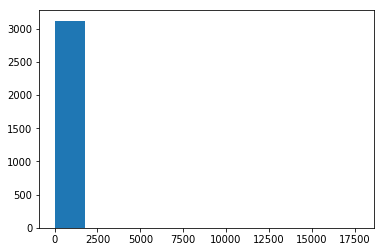

In [6]:
plot.hist(x)

In [7]:
[len(c) for c in net.connected_component_subgraphs(e) if len(c) > 10]

[17762, 64, 16, 13, 11, 11, 14, 16]

In [8]:
def trim_edges(g, weight=1):
        g2=net.Graph()
        for f, to, edata in g.edges(data=True):
                if edata['weight'] > weight:
                        g2.add_edge(f,to,edata)
        return g2

In [9]:
def island_method(g, iterations=5):
    weights= [edata['weight'] for f,to,edata in g.edges(data=True)]

    mn=int(min(weights))
    mx=int(max(weights))
    #compute the size of the step, so we get a reasonable step in iterations
    step=int((mx-mn)/iterations)

    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

The issue between the book method and the method which works is seen below.  The book never created the "list" of the network lists before having you call it. 

In order for this to work, you have to create the list of lists, THEN, run the def's, as defined above, across it.  

In [10]:
#cc=net.connected_component_subgraphs(e)[0]
CC = list(net.connected_component_subgraphs(e))[0]

In [11]:
islands=island_method(CC)

In [12]:
for i in islands:
    # print the threshold level, size of the graph, and number of connected components
    print(i[0], len(i[1]), len(list(net.connected_component_subgraphs(i[1]))))

1 12360 314
62 27 11
123 8 3
184 5 2
245 5 2


There are 5 levels to the graph due to the iterations=5 on island_method.  
Level zero has 314 island, 12360 nodes
Level one has 11 islands, 27 nodes
Level two has 3 islands, 8 nodes
So on and on...

Below, I will plot levels 2-5.  

In [13]:
#net.draw(islands[0][1])

C:\ProgramData\Anaconda3\envs\data620_web\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\ProgramData\Anaconda3\envs\data620_web\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\ProgramData\Anaconda3\envs\data620_web\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\ProgramData\Anaconda3\envs\data620_web\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time defau

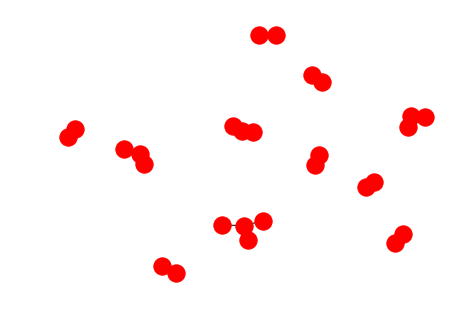

In [14]:
net.draw(islands[1][1])

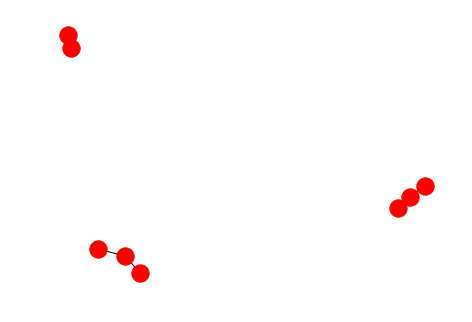

In [15]:
net.draw(islands[2][1])

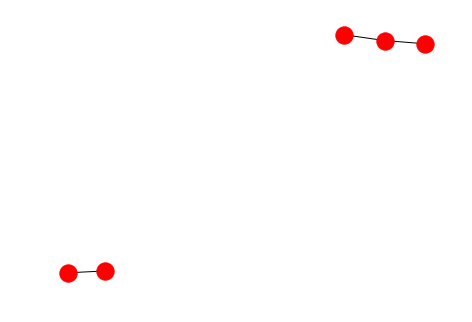

In [16]:
net.draw(islands[3][1])

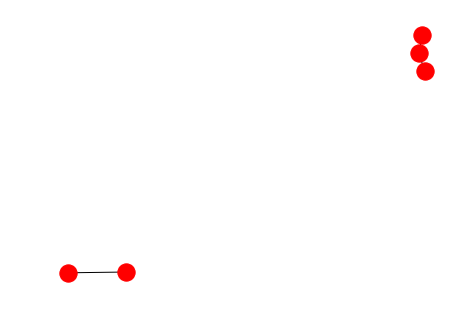

In [17]:
net.draw(islands[4][1])